# Identitas

---
Nama: Agus Prayogi

Nim : 2141720025

Kelas: D4-TI 3A

---

In [281]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Praktikum 1


In [282]:
# import package
import numpy as np
import pandas as pd
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

In [283]:
# baca data dari file CSV
data = pd.read_csv('/content/drive/Shareddrives/Kita/TugasKul/SMT5/ML/Ming3/dataset.csv')

In [284]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


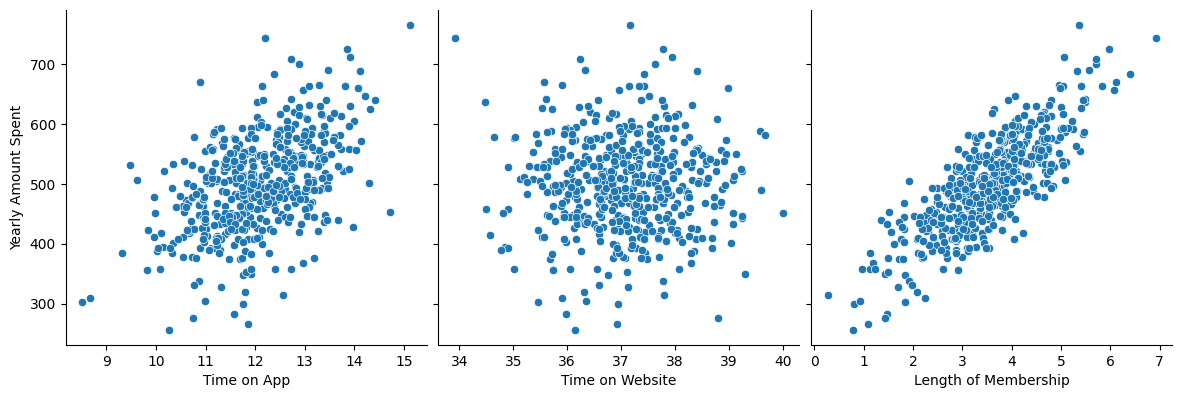

In [285]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', height=4, aspect=1, kind='scatter')
plt.show()

<ipython-input-286-9f46fa45ac4d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)


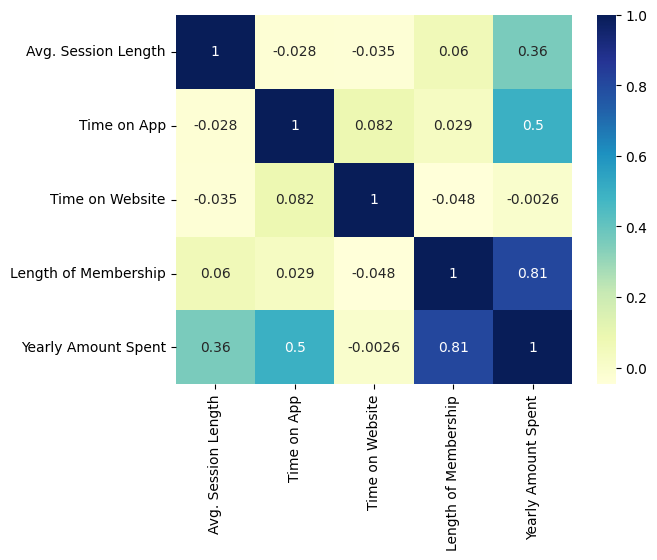

In [286]:
# visualisasi korelasi dengan heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [287]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data['Length of Membership']
y = data['Yearly Amount Spent']

In [288]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [289]:
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

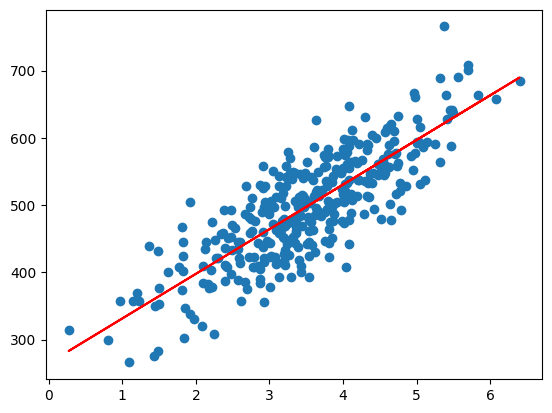

In [290]:
# Visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

In [291]:
# Prediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

# Menghitung residual
res = (y_train - y_train_pred)

<ipython-input-292-d336bf8b039e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


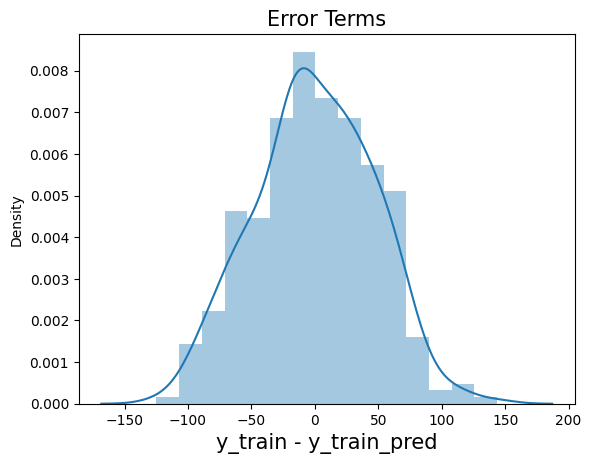

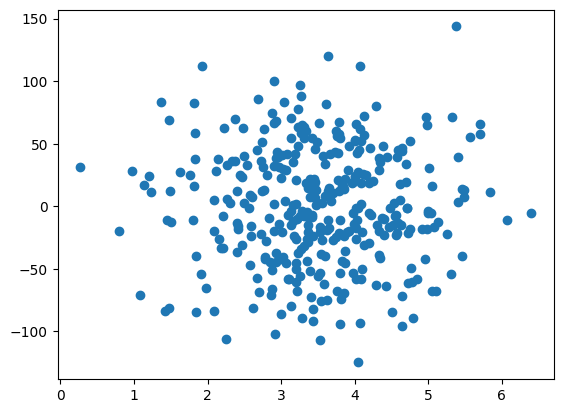

In [292]:
# Histogram residual
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

In [293]:
# Prediksi pada data uji
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

In [294]:
# Hitung nilai R-squared
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

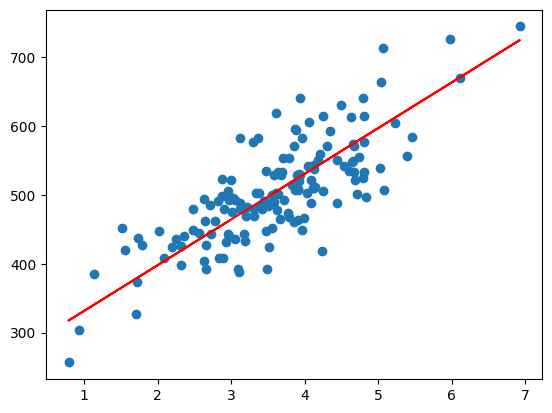

In [295]:
# Visualisasi data uji dan hasil prediksi
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

# Praktikum 2

# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [296]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('/content/drive/Shareddrives/Kita/TugasKul/SMT5/ML/Ming3/Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja

In [297]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

In [298]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

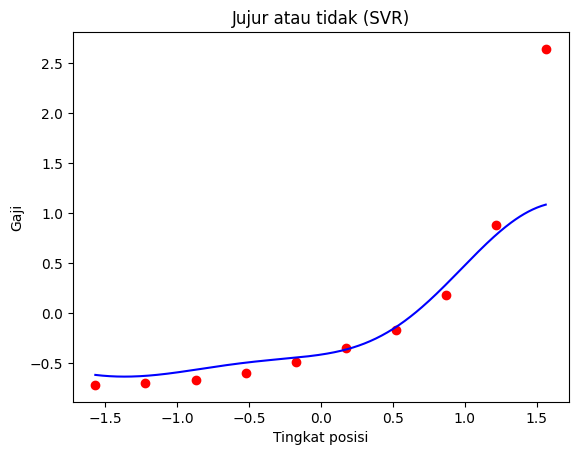

In [299]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

In [300]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

In [301]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


In [302]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Membalikkan penskalaan pada data target yang sudah diprediksi
y_actual = sc_y.inverse_transform(y)
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 249500.11150357974
MSE: 142912240625.2814
RMSE: 378037.3534788347
R-squared: -0.7717363528203269


# Tugas Praktikum

Multiple Linear Regression dan Support Vector Regression (SVR) dengan Dataset Medical Cost Personal Datasets

**Instruksi Umum:**
Anda akan menggunakan dataset

1. "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.
2. Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.

In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import statsmodels.api as sm
import seaborn as sns

In [304]:
# baca data dari file CSV
dataset = pd.read_csv('/content/drive/Shareddrives/Kita/TugasKul/SMT5/ML/Ming3/insurance.csv')

**Tugas 1: Multiple Linear Regression**


1.   Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [305]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [306]:
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [307]:
cek = dataset.duplicated().any()
print("Terdapat data dublicate:",cek)
if cek:
  # Hapus data yang dublicate
  dataset = dataset.drop_duplicates()

Terdapat data dublicate: True


In [308]:
# menentukan variabel target
target = 'charges'
# variable bebas sementara
bebas = dataset.columns.difference([target])

#### Tambahan
Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.

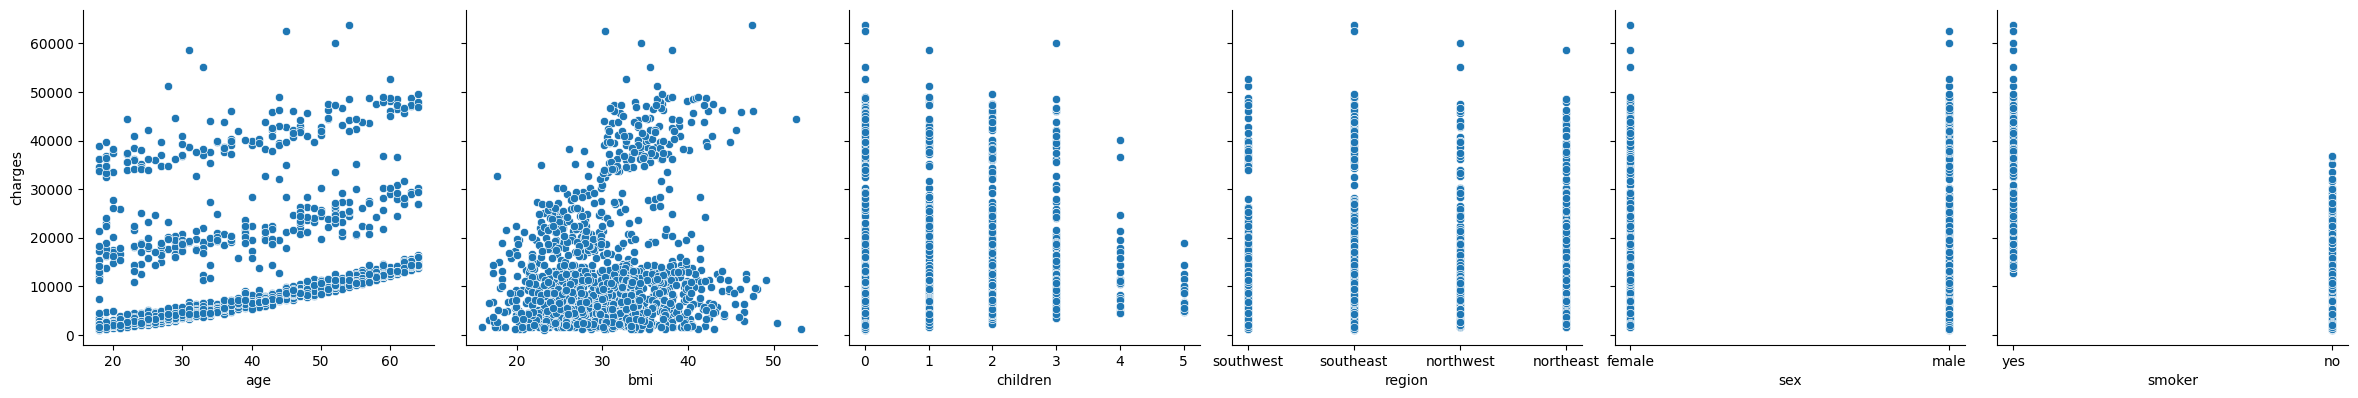

In [309]:
# visualisasi data dengan pairplot
sns.pairplot(dataset, x_vars=bebas, y_vars=target, height=4, aspect=1, kind='scatter')
plt.show()

In [310]:
le = LabelEncoder()
# cari tipe column yang string
kStrings = dataset.select_dtypes(include=['object'])
print(kStrings.columns)
for i in kStrings.columns:
  # ubah menjadi data number
  dataset[i] = le.fit_transform(dataset[i])
# tampilkan isi data
dataset.head()

Index(['sex', 'smoker', 'region'], dtype='object')


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Gunakan heatmap untuk menampilkan matriks korelasi antara variabel-variabel dalam dataset. Semakin tinggi nilainya, semakin tinggi korelasinya.

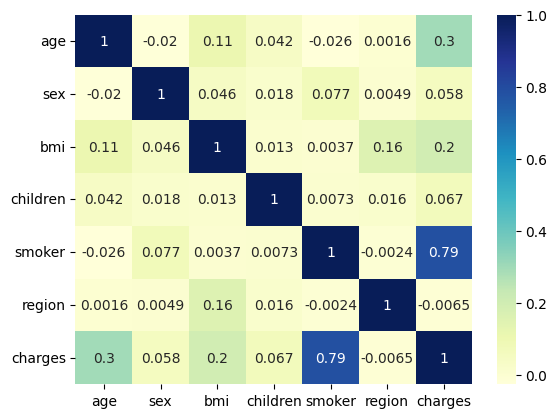

In [311]:
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)
plt.show()

---
Variable Target (dependen)

---


**charges** => biaya medis ini bergantung pada beberapa variabel bebas.

---
Variable Bebas

---

**bmi** => Body Mass Index adalah indikator kesehatan yang dapat memengaruhi biaya medis.

**smoker** => Status perokok adalah salah satu faktor yang sangat signifikan karena perokok cenderung memiliki biaya yang lebih tinggi.

**age** => Umur terkadang dapat mempengaruhi kesehatan, yang bisa menambah biaya medis.

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [312]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
x = dataset[['bmi','age','smoker']]
y = dataset['charges']

# Pembagian data latih dan data uji dengan proporsi 7:3
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

**3.** Lakukan feature scaling jika diperlukan.

In [313]:
std_scaler = StandardScaler()
x_train_scr = std_scaler.fit_transform(x_train)
x_test_scr = std_scaler.transform(x_test)

**4.** Buat model multiple linear regression menggunakan Scikit-Learn.

In [314]:
# buat model mlr
mlr= LinearRegression()

In [315]:
# buat model SVR
regressor = SVR(kernel='linear')

5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [316]:
# latih dengan MLR
mlr.fit(x_train, y_train)
mlr.fit(x_test, y_test)

LinearRegression()

In [317]:
#lihat model coefficients
print(mlr.intercept_)
# liat list berdasarkan nama pada model coefficients
list(zip(x, mlr.coef_))

-13158.128423947544


[('bmi', 378.87457276127026),
 ('age', 243.68837265149),
 ('smoker', 23398.543747292675)]

In [318]:
# Predicting the Test and Train set result MLR
y_test_pred = mlr.predict(x_test)
y_train_pred = mlr.predict(x_train)

In [319]:
# latih SVR
regressor.fit(x_test_scr, y_test)
regressor.fit(x_train_scr, y_train)

# prediksi SVR
y_test_pred_svr = regressor.predict(x_test_scr)
y_train_pred_svr = regressor.predict(x_train_scr)

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [320]:
# Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_test_pred})
mlr_diff

,Actual value,Predicted value
12,1826.84300,5479.989450
306,20177.67113,4084.196761
318,7421.19455,8038.147537
816,2842.76075,1868.629045
157,15518.18025,24164.973400
...,...,...
711,10107.22060,7944.997651
1006,4438.26340,4751.016009
389,4618.07990,4136.193363
924,6250.43500,6110.361688


In [321]:
# evaluasi model MLR
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

print("R-squared: {:.2f}".format(r2))
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))

R-squared: 0.76
Mean Squared Error (MSE): 30953379.86
Mean Absolute Error (MAE): 3876.59


In [322]:
# evaluasi model SVR
r2 = r2_score(y_test, y_test_pred_svr)
mse = mean_squared_error(y_test, y_test_pred_svr)
mae = mean_absolute_error(y_test, y_test_pred_svr)

print("R-squared: {:.2f}".format(r2))
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))

R-squared: -0.02
Mean Squared Error (MSE): 134070003.37
Mean Absolute Error (MAE): 7238.21


### Visualisasi Data

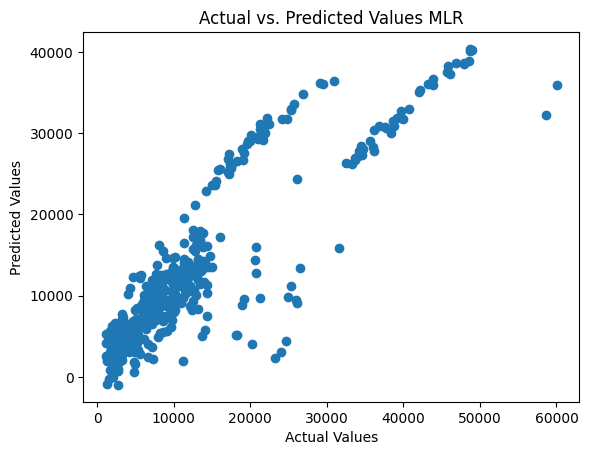

In [323]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values MLR')
plt.show()

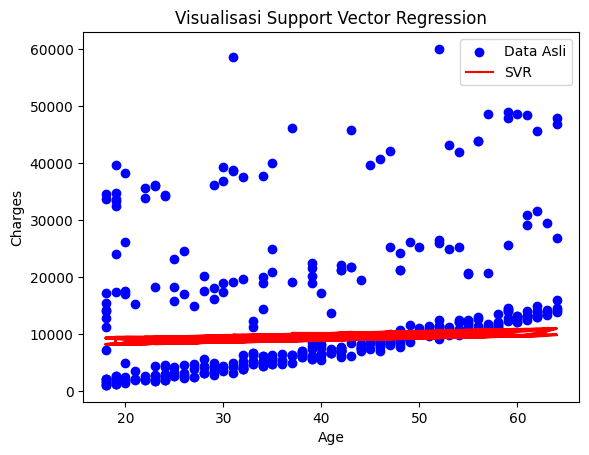

In [334]:
# Membuat plot data asli
x = x_test[['age']]
y = y_test

# Scaling data
# x_scr = std_scaler.fit_transform(x)
# latih
regressor.fit(x, y)
# prediksi
y_pred = regressor.predict(x)

plt.scatter(x, y, label='Data Asli', color='blue')

# Membuat plot garis hasil prediksi
plt.plot(x, y_test_pred_svr, label='SVR', color='red')

plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Visualisasi Support Vector Regression')
plt.legend()
plt.show()


**Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda**

Dari hasil gambar visualisasi diatas bahwa umur mempengaruhi biaya minimum untuk biaya kesehatan.